In [4]:
import os
import copy
import matplotlib


#global projects 
projects= ["lucida", "word", "anonymouth","h2o-2","phimpme-android", "GeometricWeather", "Arduino" ,"lbry-android", "litho", "PictureSelector", "SmarterStreaming", "lawnchair", "NekoX", "hudi", "PojavLauncher", "beam" ]
colours_for_projects = ["red","red","red","red", "red", "red","red", "red","green","green","green", "green","green","green","green", "green"]

if len(projects) != len(colours_for_projects):
    print("\n Lists are NOT the same length!! Check you input\n\n")
    print(f"{len(projects)} vs {len(colours_for_projects)}")
else:
    print("input lists are the same length")

input lists are the same length


In [5]:

def data_prep(metric_index:int, requested_projects=None):
    """
    Prepare and fetch data for visualization.
    """

    global projects
    project_paths: list[str] = []
    
    if requested_projects is None:
        requested_projects = copy.deepcopy(projects)
    
    
    absolute_path = os.path.abspath(os.getcwd())
    
    data = {}

    for project in requested_projects:
        project_path = os.path.join(absolute_path, project)
        project_paths.append(project_path)
    
        project_csv_path = os.path.join(project_path , project + "class.csv")
        with open(project_csv_path, "r", encoding="UTF8") as project_csv:
    
         
            reader = csv.reader(project_csv)
            data_list = []
            next(reader)  # Skip the header
            for idx, row in enumerate(reader, start=1):
                #print(row[metric_index])
                if len(row) > metric_index:
                    data_list.append(int(row[metric_index]))
                    
        data[project] = data_list
        
        
        #print(data_list)
        
    return data


    
def weighted_data_prep(metric_index:int, requested_projects=None):
    """
    Prepare and fetch data for visualization.
    """

    global projects
    project_paths: list[str] = []
    
    if requested_projects is None:
        requested_projects = projects
    
    
    absolute_path = os.path.abspath(os.getcwd())
    
    data = {}
    weight_index = 15 #at index 10 is totalMethodsQty

    for project in requested_projects:
        project_path = os.path.join(absolute_path, project)
        project_paths.append(project_path)
    
        project_csv_path = os.path.join(project_path , project + "class.csv")
        with open(project_csv_path, "r", encoding="UTF8") as project_csv:
    
         
            reader = csv.reader(project_csv)
            data_list = []
            next(reader)  # Skip the header
            for idx, row in enumerate(reader, start=1):
                #print(row[metric_index])
                #print(f"weight for {project} = {(row[weight_index])}")
                if len(row) > metric_index and int(row[weight_index]) != 0:
                    data_list.append((int((row[metric_index])) / (int(row[weight_index]))))
                    
        data[project] = data_list
        
    return data

In [26]:
import csv 


indexes = [3,8,7,9,10,11]
aggregated_data = {
    "lucida": ["dead"],
    "word": ["dead"],
    "anonymouth": ["dead"],
    "h2o-2": ["dead"],
    "phimpme-android": ["dead"],
    "GeometricWeather": ["dead"],
    "Arduino": ["dead"],
    "lbry-android": ["dead"],
    "litho": ["alive"],
    "PictureSelector": ["alive"],
    "SmarterStreaming": ["alive"],
    "lawnchair": ["alive"],
    "NekoX": ["alive"],
    "hudi": ["alive"],
    "PojavLauncher": ["alive"],
    "beam": ["alive"]
}

for metric in indexes:
    data = data_prep(metric)
    averaged_data = {p:sum(v)/len(v) for (p,v) in data.items()}
    
    #print(averaged_data)
    for project,project_data in averaged_data.items(): 
        aggregated_data[project].append(project_data)
 
       
with open (r"average_values.csv", "w") as file:
    
    file.write("project,status,CBO,DIT,WMC,NCO,RFC,LCOM")   
    
    for project in aggregated_data:
        new_line = f"\n{project}"
        for metric in aggregated_data[project]:
            new_line += f",{metric}"
        
        file.write(new_line)
            
            
    
    

Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5

Feature Importance:
       importance
CBO     0.344169
RFC     0.168406
DIT     0.160135
LCOM    0.141761
NCO     0.115755
WMC     0.069773


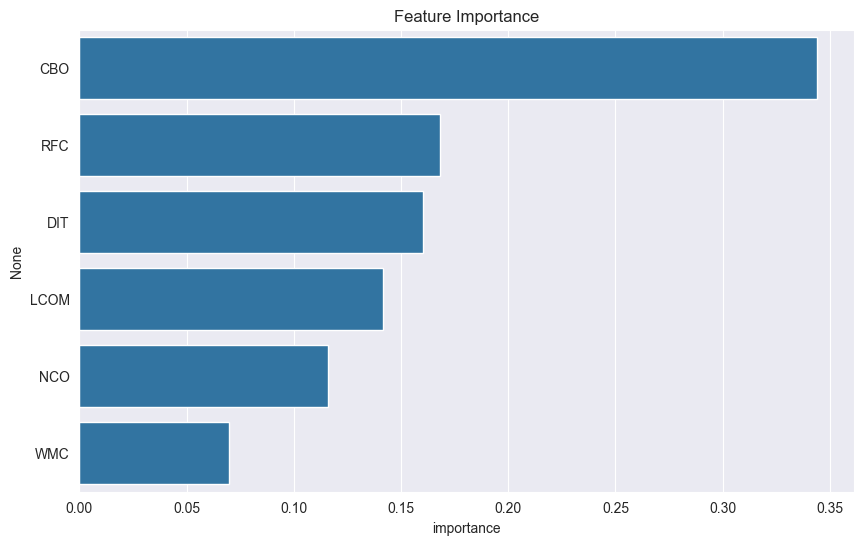

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('average_values.csv')

# Prepare the features and target variable
X = data[['CBO', 'DIT', 'WMC', 'NCO', 'RFC', 'LCOM']]
y = data['status'].apply(lambda x: 1 if x == 'alive' else 0)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Determine feature importance
feature_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)
print("Feature Importance:\n", feature_importances)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances.importance, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()


In [72]:
from scipy.stats import mannwhitneyu
import csv
# Step 1: Data Preparation
# Assuming you have extracted the CBO values for red and green projects from the CSV file

dead_projects = ["lucida", "word", "anonymouth","h2o-2","phimpme-android", "GeometricWeather", "Arduino" ,"lbry-android"]
alive_projects = ["litho", "PictureSelector", "SmarterStreaming", "lawnchair", "NekoX", "hudi", "PojavLauncher", "beam"]

# Step 2: Data Preprocessing
#deadProj_weigh_data = weighted_data_prep(3, requested_projects=dead_projects)
#aliveProj_weigh_data = weighted_data_prep(3, requested_projects=alive_projects)

# Step 2: Data Preprocessing
deadProj_weigh_data = data_prep(11, requested_projects=dead_projects)
aliveProj_weigh_data = data_prep(11, requested_projects=alive_projects)

deadProj_data = []
aliveProj_data = []

for proj in dead_projects:
    deadProj_data += deadProj_weigh_data[proj]

for proj in alive_projects:
    aliveProj_data += aliveProj_weigh_data[proj]

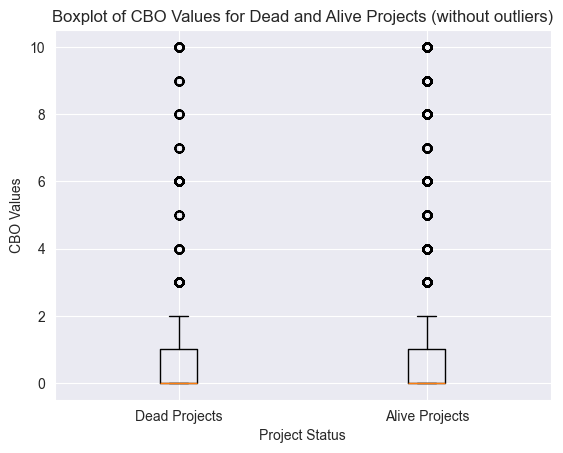


Dead Projects:
  Median: 0.0
  Lower Quartile (Q1): 0.0
  Upper Quartile (Q3): 1.0
  Lower Whisker: 0.0
  Upper Whisker: 2.0
  Outliers: [ 8  3  6  4  6  7  3 10  7  5  3  5  5  4  3  6  5  9  6  6  3  5  5  5
  3  3  5  3  7  3  6  7  7 10  6  3  6 10  6  7  4  9  8  6  3 10 10  6
  3 10  8  6  3 10  9  3  6  3 10  3 10  6  3  4  6  3  6  6  3  3 10  3
  6  6  6  6  6  3  6  3 10  4  7 10 10  5  6 10  6  6  6  6  6  8  3  8
  6  8  7  8  3  3  3  6  6  8  3  9  9  6 10  6  4  3  4  7  6  3  4  7
  6  4  8  9  6  6  9  3  3  3  4  6  3  3  3 10  4  6 10  3  6 10  3  8
  6 10 10  7  3  6  5  5  6  3 10  4  6  4  8  3  4  9  6  9  3  3 10  6
  5  6  3  6  9  3  6 10  6 10  6  3  3  4  9  6  6  3  3  6  3  6 10 10
  3  3  3 10  3  5 10  5  6 10  6  4  6  4  8  8  3  6  8 10  3 10  6  8
  6  3  3  3  6  3 10 10  6  3  3  3  6  3  7  3 10  9  6  6  3  3  6  3
  6  4  3  6  6  3  3  3 10  3  6  4  3  6  4  3 10  6  4  6  6  7  6  6
 10  6  3  3  3  4 10  6  8  6  7 10  4  6  6  6  3  3  9  

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# Define a function to remove outliers using IQR method
def remove_outliers(data):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return [x for x in data if x >= lower_bound and x <= upper_bound]

# Remove outliers from the data
deadProj_data_no_outliers = remove_outliers(deadProj_data)
aliveProj_data_no_outliers = remove_outliers(aliveProj_data)


# Combine the data for boxplot
data_no_outliers = [deadProj_data_no_outliers, aliveProj_data_no_outliers]

# Create a boxplot without outliers
boxplot_dict = plt.boxplot(data_no_outliers, labels=['Dead Projects', 'Alive Projects'])

# Add labels and title
plt.xlabel('Project Status')
plt.ylabel('CBO Values')
plt.title('Boxplot of CBO Values for Dead and Alive Projects (without outliers)')

# Show the plot
plt.show()

# Extracting and printing box plot details
def print_boxplot_details(boxplot_dict):
    for i, label in enumerate(['Dead Projects', 'Alive Projects']):
        print(f"\n{label}:")
        print(f"  Median: {boxplot_dict['medians'][i].get_ydata()[0]}")
        print(f"  Lower Quartile (Q1): {boxplot_dict['boxes'][i].get_ydata()[1]}")
        print(f"  Upper Quartile (Q3): {boxplot_dict['boxes'][i].get_ydata()[2]}")
        print(f"  Lower Whisker: {boxplot_dict['whiskers'][2*i].get_ydata()[1]}")
        print(f"  Upper Whisker: {boxplot_dict['whiskers'][2*i+1].get_ydata()[1]}")
        print(f"  Outliers: {boxplot_dict['fliers'][i].get_ydata()}")

# Print the details
print_boxplot_details(boxplot_dict)


In [74]:

# Statistical Test (Mann-Whitney U test)
statistic, p_value = mannwhitneyu(deadProj_data_no_outliers, aliveProj_data_no_outliers)
# Interpretation
alpha = 0.05  # significance level
print(f"Mann-Whitney U test statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a statistically significant difference.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference.")

Mann-Whitney U test statistic: 67534509.0
P-value: 0.16771933374681147
Fail to reject the null hypothesis: There is no statistically significant difference.
